In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Internship/Fraud.csv", encoding = "ISO-8859-1")

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
print(df["isFraud"].unique())

[0 1]


In [12]:
print(df["isFlaggedFraud"].unique())

[0 1]


In [13]:
(df["isFraud"] == 1).sum()

8213

In [14]:
(df["isFlaggedFraud"] == 1).sum()

16

In [15]:
# if df["isFlaggedFraud"] = 1:
print(df.loc[df["isFlaggedFraud"] == 1])

         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C214003857

In [16]:
print(df.loc[df["isFraud"] == 1])

         step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
251         1  TRANSFER     2806.00  C1420196421        2806.00   
252         1  CASH_OUT     2806.00  C2101527076        2806.00   
680         1  TRANSFER    20128.00   C137533655       20128.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                   0.0   C553264065            0.00            0.00        1   
3                   0.0    C38997

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
y = df.isFraud
x = df.drop(['isFraud' , 'type' , 'nameOrig' , 'nameDest', 'isFlaggedFraud'], axis=1)

In [19]:
data = df.drop(['isFraud', 'isFlaggedFraud'] , axis=1)

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
dtypes: float64(5), int64(1)
memory usage: 291.3 MB


# **EDA**

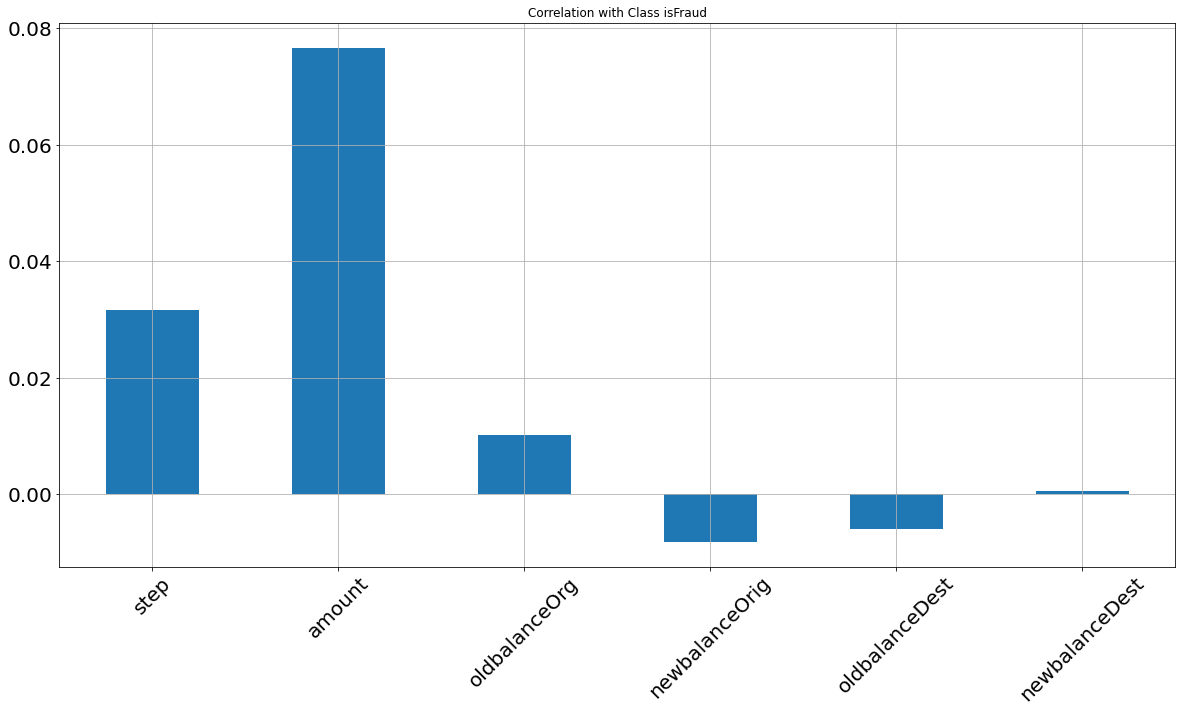

In [21]:
data.corrwith(df.isFraud).plot.bar(
        figsize = (20, 10), title = "Correlation with Class isFraud", fontsize = 20,
        rot = 45, grid = True)

Seeing the plot we can figure out that the fraud tansactions mostly depend on step and the amount.

                                       Correlation Matrix                                       


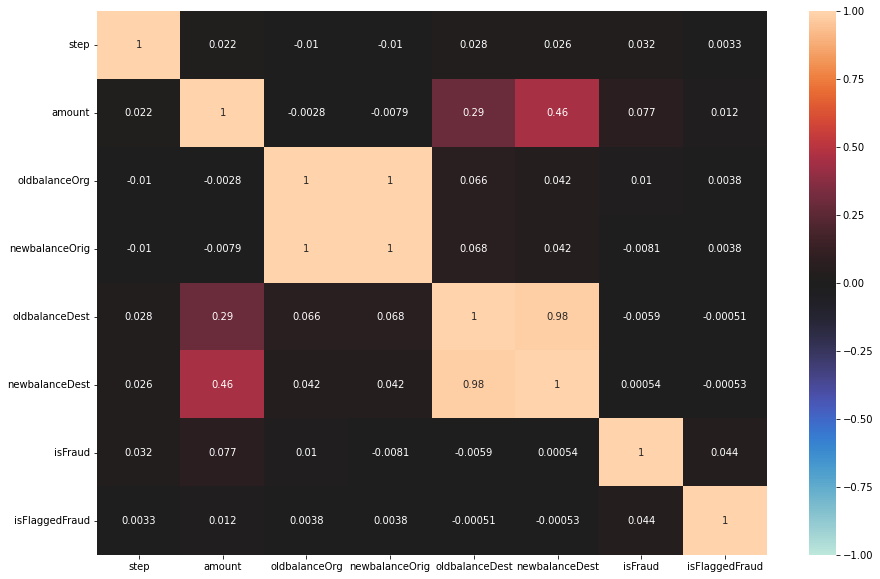

In [22]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [ ]:
cmat, pred = RunModel(lr, x_train, y_train, x_test, y_test)

In [26]:
!pip install scikit-plot
import scikitplot as skplt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


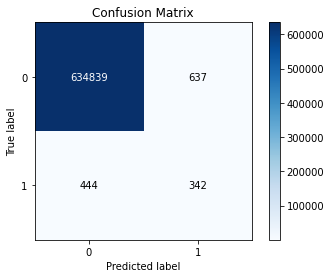

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9983010143620081

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635476
           1       0.35      0.44      0.39       786

    accuracy                           1.00    636262
   macro avg       0.67      0.72      0.69    636262
weighted avg       1.00      1.00      1.00    636262



# **Decision Trees**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
dt_classifier = DecisionTreeClassifier()
# train model by using fit method
print("Model training starts........")
dt_classifier.fit(x_train, y_train.values.ravel())
print("Model training completed")
acc_score = dt_classifier.score(x_test, y_test)
print(f'Accuracy of model on test dataset :- {acc_score}')
# predict result using test dataset
y_pred = dt_classifier.predict(x_test)
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Model training starts........
Model training completed
Accuracy of model on test dataset :- 0.9996652322470931
Confusion Matrix :- 
 [[635349     96]
 [   117    700]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.88      0.86      0.87       817

    accuracy                           1.00    636262
   macro avg       0.94      0.93      0.93    636262
weighted avg       1.00      1.00      1.00    636262



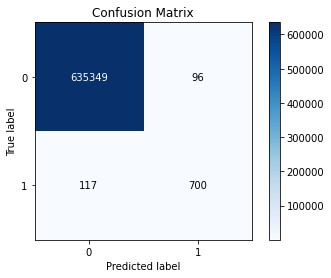

In [28]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=50)
# train model by using fit method
print("Model training starts........")
rf_classifier.fit(x_train, y_train.values.ravel())
acc_score = rf_classifier.score(x_test, y_test)
print(f'Accuracy of model on test dataset :- {acc_score}')
# predict result using test dataset
y_pred = rf_classifier.predict(x_test)
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Model training starts........
Accuracy of model on test dataset :- 0.9996290836164976
Confusion Matrix :- 
 [[635425     20]
 [   216    601]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.97      0.74      0.84       817

    accuracy                           1.00    636262
   macro avg       0.98      0.87      0.92    636262
weighted avg       1.00      1.00      1.00    636262



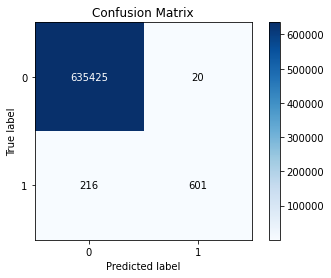

In [30]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# **Deep Learning Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
model = Sequential([
     #First Layer
     Dense(units=32, input_dim=6, activation='relu'),
      #Second Layer
     Dense(units=16,activation='relu'),
    #  Dropout(0.5),
      #Third Layer
     Dense(8,activation='relu'),
     #Fourth Layer
    #  Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')  
    
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, batch_size=256, epochs=5)

Epoch 1/5
22369/22369 [==============================] - 91s 4ms/step - loss: 48.0228 - accuracy: 0.9963
Epoch 2/5
22369/22369 [==============================] - 82s 4ms/step - loss: 0.0796 - accuracy: 0.9987
Epoch 3/5
22369/22369 [==============================] - 84s 4ms/step - loss: 0.2473 - accuracy: 0.9987
Epoch 4/5
22369/22369 [==============================] - 82s 4ms/step - loss: 1.3467 - accuracy: 0.9987
Epoch 5/5
22369/22369 [==============================] - 84s 4ms/step - loss: 0.0697 - accuracy: 0.9987


In [ ]:
score=model.evaluate(x_test,y_test)
print(score)

19884/19884 [==============================] - 49s 2ms/step - loss: 0.0128 - accuracy: 0.9987
[0.012821521610021591, 0.9986515045166016]


In [ ]:
y_pred=model.predict(x_test)
y_test=pd.DataFrame(y_test)

19884/19884 [==============================] - 31s 2ms/step
